# SMM636 Machine Learning, Group Coursework 2
Group: Group 8

Dataset: IMDB-Movies.csv

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# Load the dataset
df = pd.read_csv('IMDB-Movies.csv')
df.head()

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32
1,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57
2,3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15
3,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99
4,5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68


## 0. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50 non-null     int64  
 1   Title               50 non-null     object 
 2   Genre               50 non-null     object 
 3   Description         50 non-null     object 
 4   Director            50 non-null     object 
 5   Actors              50 non-null     object 
 6   Year                50 non-null     int64  
 7   Runtime..Minutes.   50 non-null     int64  
 8   Rating              50 non-null     float64
 9   Votes               50 non-null     int64  
 10  Revenue..Millions.  47 non-null     float64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ KB


In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0            0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    3
dtype: int64

In [7]:
# Remove NA
df = df.dropna()

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'Title', 'Genre', 'Description', 'Director', 'Actors',
       'Year', 'Runtime..Minutes.', 'Rating', 'Votes', 'Revenue..Millions.'],
      dtype='object')


## 1. Principal Component Analysis (PCA)

In [10]:
# Preprocess the data: Exclude non-numeric columns and Year
df['Revenue..Millions.'] = df['Revenue..Millions.'].fillna(df['Revenue..Millions.'].median())
numeric_cols = ['Runtime..Minutes.', 'Rating', 'Votes', 'Revenue..Millions.']
numeric_data = df[numeric_cols].dropna()

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)

PCA(n_components=4)

In [12]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

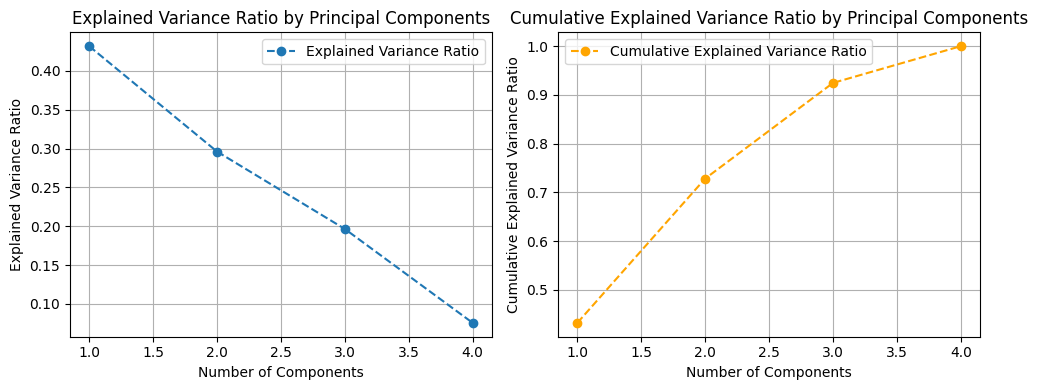

In [13]:
# Plot explained variance ratio and cumulative explained variance ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot explained variance ratio
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance Ratio')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance Ratio by Principal Components')
ax1.legend()
ax1.grid(True)

# Plot cumulative explained variance ratio
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange', label='Cumulative Explained Variance Ratio')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance Ratio by Principal Components')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# Create a DataFrame for explained variance ratio and cumulative explained variance ratio
data = {
    "Principal Component": [f"PC{i+1} ({col})" for i, col in enumerate(numeric_cols)],
    "Explained Variance Ratio": explained_variance,
    "Cumulative Explained Variance Ratio": cumulative_variance
}
df_var_ratio = pd.DataFrame(data)

# Print as a table
df_var_ratio

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,PC1 (Runtime..Minutes.),0.431950,0.431950
1,PC2 (Rating),0.296157,0.728107
2,PC3 (Votes),0.196433,0.924540
3,PC4 (Revenue..Millions.),0.075460,1.000000


In [15]:
# Extracting the PCA loadings (how each variable contributes to each principal component)
pca_loadings = pca.components_

# Creating a DataFrame for the loadings for easier interpretation
loadings_df = pd.DataFrame(pca_loadings, columns=[f'PC{i+1}' for i in range(pca_loadings.shape[1])], index=numeric_cols)

# Displaying the loadings DataFrame
print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
                         PC1       PC2       PC3       PC4
Runtime..Minutes.   0.274519  0.444094  0.693758  0.496105
Rating             -0.627404 -0.472413  0.115823  0.608091
Votes              -0.708938  0.674149 -0.002863 -0.207177
Revenue..Millions.  0.168553  0.353738 -0.710829  0.584108


In [16]:
# Determine number of components to explain 95% variance
n_components = len(explained_variance[explained_variance.cumsum() <= 0.95]) + 1
print("Number of components to explain 95% variance:", n_components)

# Reducing dimensions
pca_reduced = PCA(n_components=n_components)
principal_components = pca_reduced.fit_transform(scaled_data)

Number of components to explain 95% variance: 4


/Users/luesisissychen/anaconda3/envs/Bayes_new/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


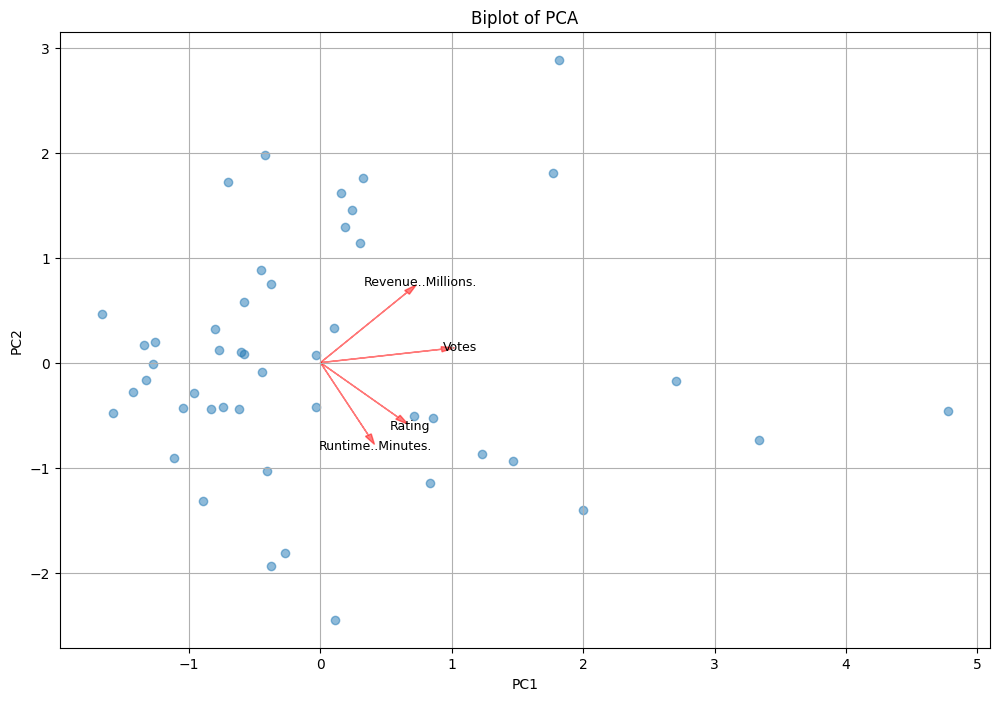

In [17]:
# Plot biplot
def biplot(data, pca_model, figsize=(12, 8)):
    pca_scores = pca_model.transform(data)
    loadings = pca_model.components_.T * np.sqrt(pca_model.explained_variance_)
    
    plt.figure(figsize=figsize)
    plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.5)
    for i, varname in enumerate(data.columns):
        plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5, head_width=0.05, head_length=0.1)
        plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, varname, color='black', ha='center', va='center', fontsize=9)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot of PCA')
    plt.grid(True)
    plt.show()

biplot(pd.DataFrame(scaled_data, columns=numeric_cols), pca)

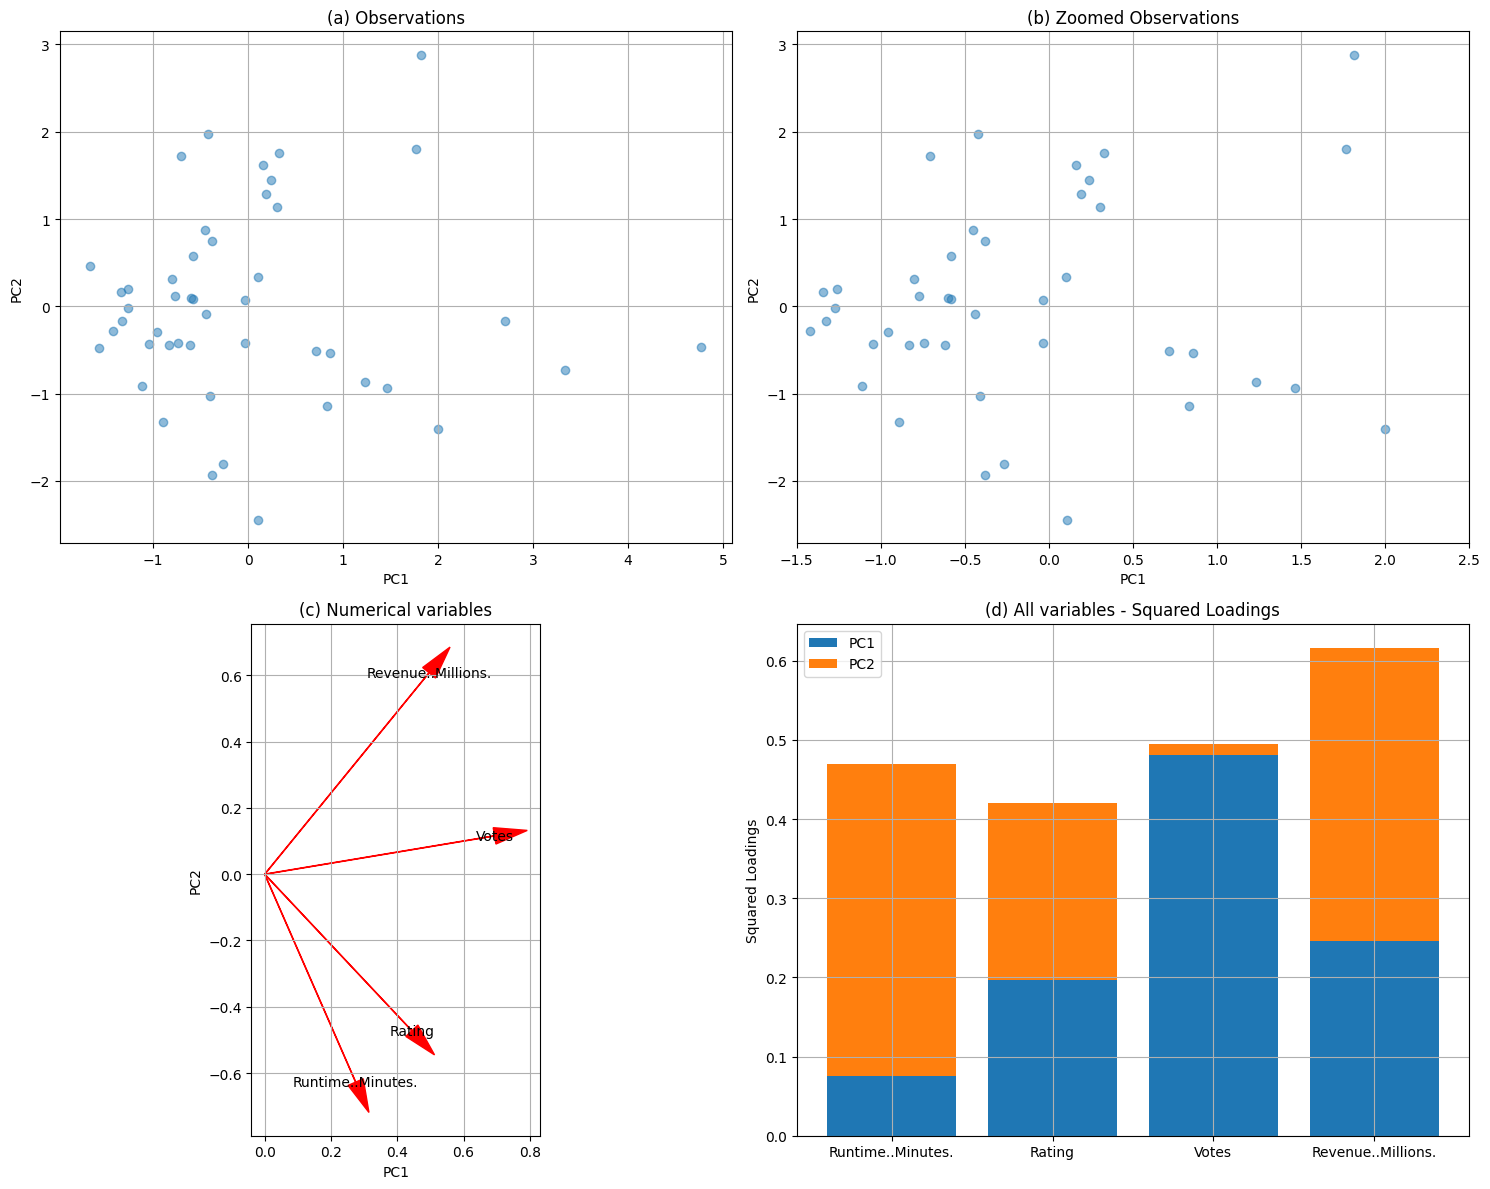

In [18]:
# Applying PCA to the standardized data to get 4 principal components
pca_model = PCA(n_components=4)
pca_model.fit(scaled_data)

# Extracting the PCA scores and loadings
scores = pca_model.transform(scaled_data)
loadings = pca_model.components_.T

# Plotting PCA results
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot (a) Observations
# Scatter plot of the first two principal components
axs[0, 0].scatter(scores[:, 0], scores[:, 1], alpha=0.5)
axs[0, 0].set_title('(a) Observations')
axs[0, 0].set_xlabel('PC1')
axs[0, 0].set_ylabel('PC2')
axs[0, 0].grid(True)

# Plot (b) Zoomed Observations
# For demonstration, we'll use it to show a zoomed-in version of the scatter plot.
axs[0, 1].scatter(scores[:, 0], scores[:, 1], alpha=0.5)
axs[0, 1].set_xlim(-1.5, 2.5)
axs[0, 1].set_title('(b) Zoomed Observations')
axs[0, 1].set_xlabel('PC1')
axs[0, 1].set_ylabel('PC2')
axs[0, 1].grid(True)

# Plot (c) Numerical variables - Correlation circle
for i, varname in enumerate(numeric_cols):
    axs[1, 0].arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', head_width=0.05, head_length=0.1)
    axs[1, 0].text(loadings[i, 0], loadings[i, 1], varname, color='black', ha='center', va='center')
axs[1, 0].set_aspect('equal')
axs[1, 0].set_title('(c) Numerical variables')
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC2')
axs[1, 0].grid(True)

# Plot (d) All variables - Square loadings plot
axs[1, 1].bar(numeric_cols, loadings[:, 0]**2, label='PC1')
axs[1, 1].bar(numeric_cols, loadings[:, 1]**2, bottom=loadings[:, 0]**2, label='PC2')
axs[1, 1].set_title('(d) All variables - Squared Loadings')
axs[1, 1].set_ylabel('Squared Loadings')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 2. Cluster - kMeans

### Direct Clustering on Original Variables

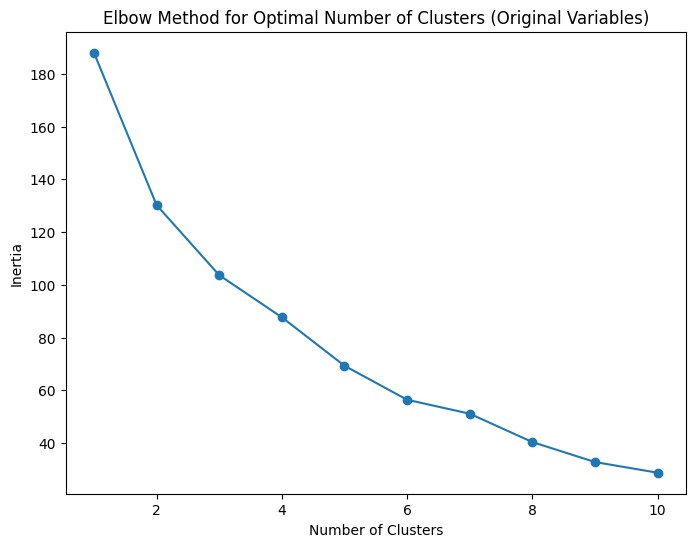

In [21]:
# Perform the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Original Variables)')
plt.show()

In [22]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
numeric_data['Cluster'] = cluster_labels

# Describe the characteristics of each cluster
cluster_summary = numeric_data.groupby('Cluster').mean()

# Print the cluster summary
print(cluster_summary)

         Runtime..Minutes.    Rating         Votes  Revenue..Millions.
Cluster                                                               
0               116.409091  8.250000  4.956650e+05          149.494545
1               156.100000  8.450000  1.115386e+06          355.448000
2               148.266667  8.266667  2.370319e+05           38.252667


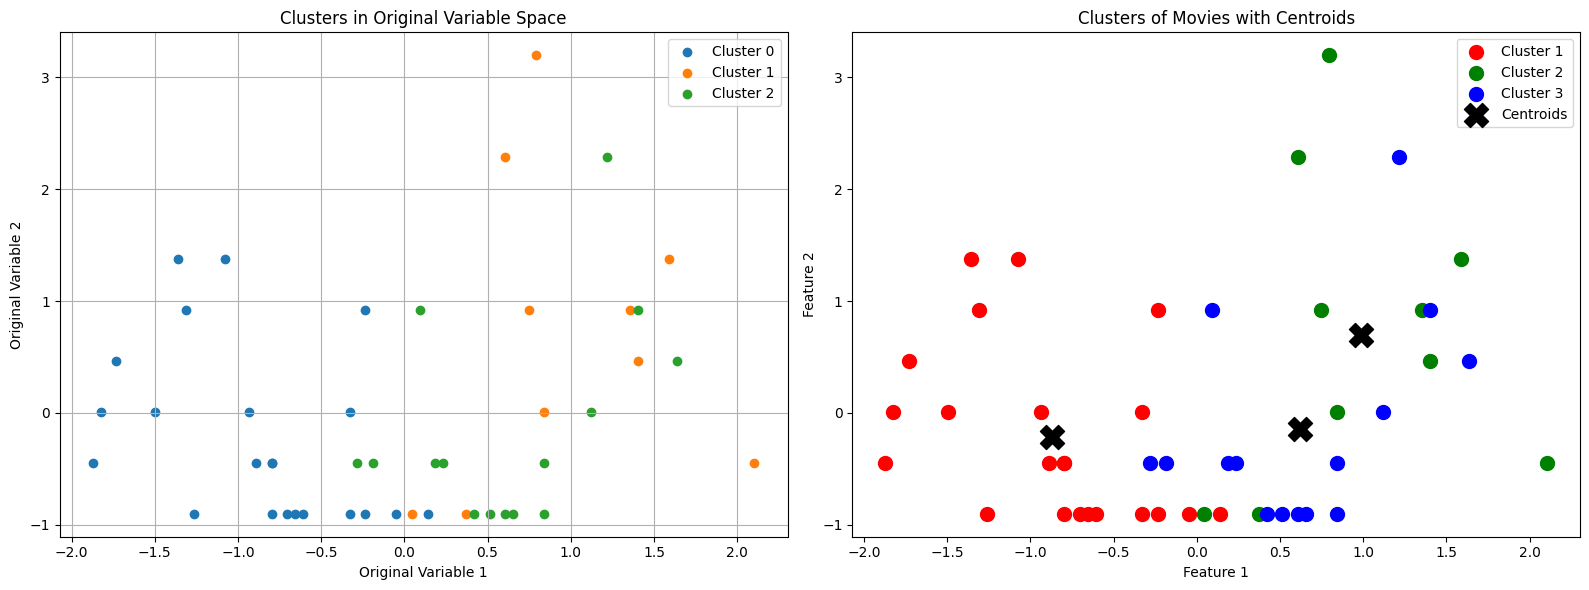

In [23]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot clusters in original variable space
axes[0].set_title('Clusters in Original Variable Space')
for cluster in range(3):
    axes[0].scatter(scaled_data[cluster_labels == cluster, 0], 
                    scaled_data[cluster_labels == cluster, 1], 
                    label=f'Cluster {cluster}')
axes[0].set_xlabel('Original Variable 1')
axes[0].set_ylabel('Original Variable 2')
axes[0].legend()
axes[0].grid(True)

# Plot clusters of movies with centroids
axes[1].set_title('Clusters of Movies with Centroids')
colors = ['r', 'g', 'b']
for i in range(3):
    axes[1].scatter(scaled_data[cluster_labels == i, 0], scaled_data[cluster_labels == i, 1], 
                    s=100, c=colors[i], label=f'Cluster {i+1}')
centroids = kmeans.cluster_centers_
axes[1].scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label='Centroids', marker='X')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

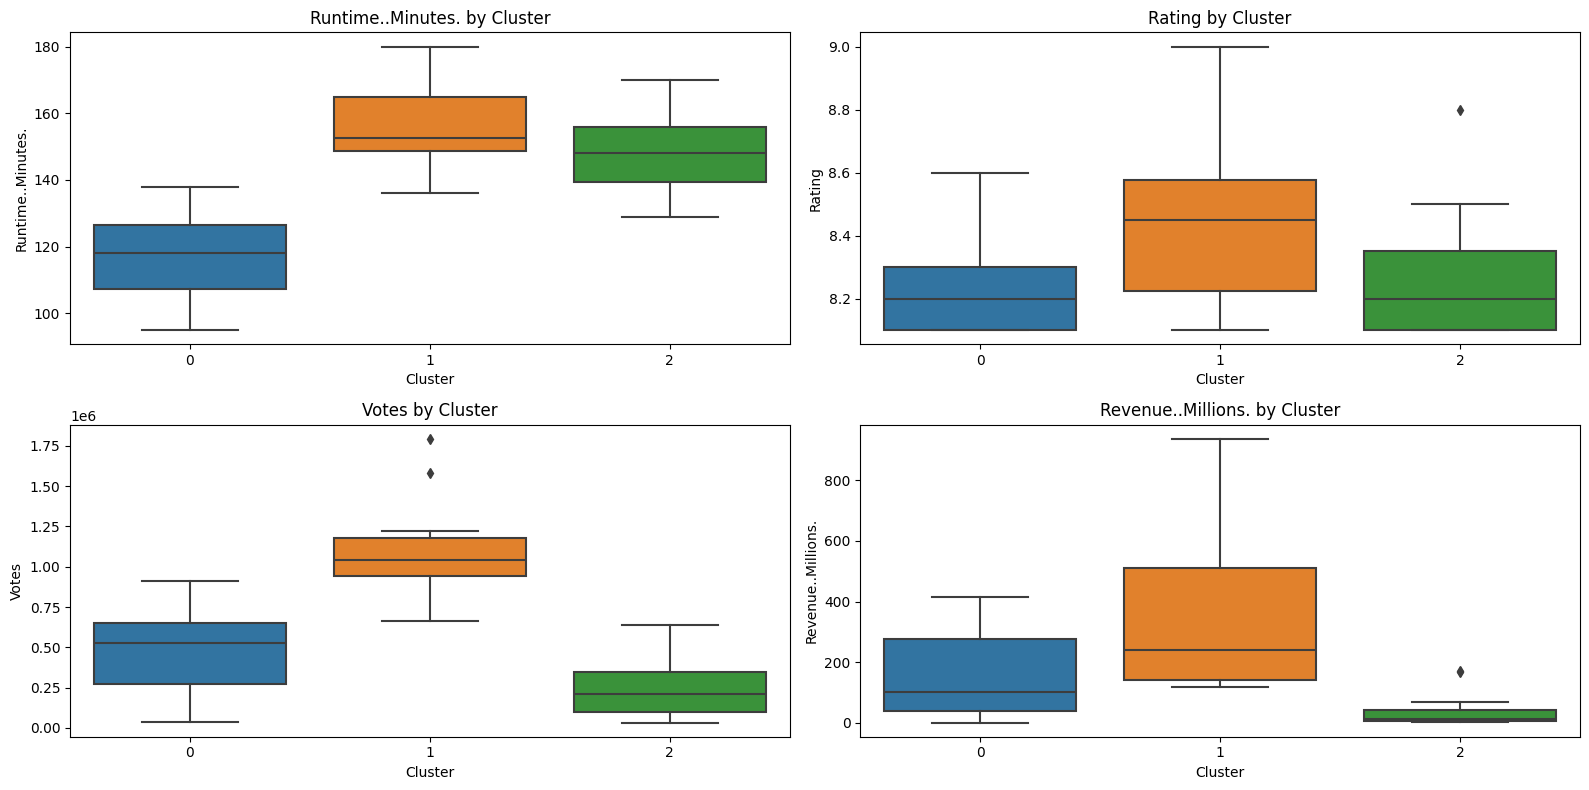

In [24]:
# Cluster Box Plots
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=col, data=numeric_data)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()

### Clustering on Principal Components

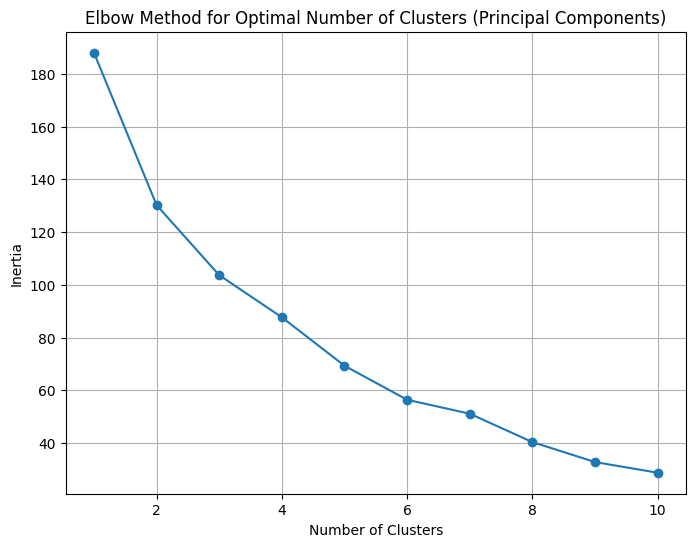

In [26]:
# Perform the elbow method
inertia_pca = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(principal_components)
    inertia_pca.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Principal Components)')
plt.grid(True)
plt.show()

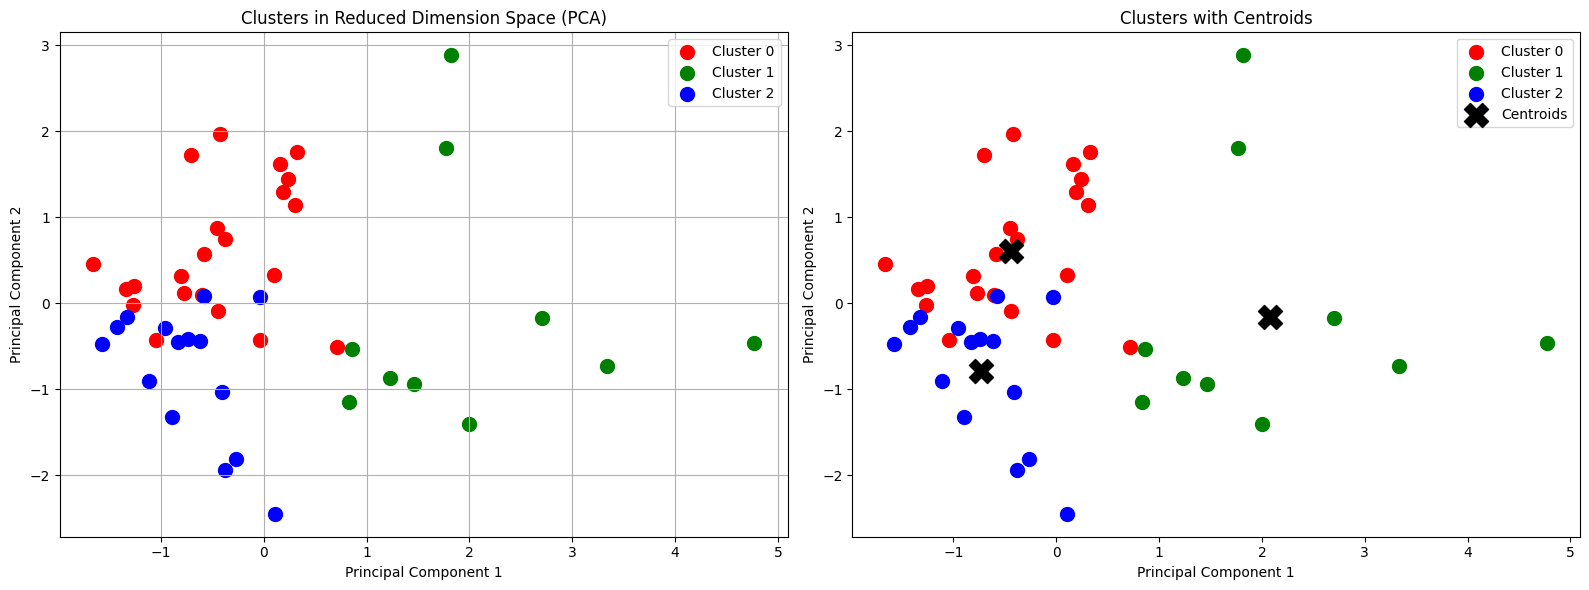

In [27]:
# Perform K-means clustering on principal components
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(principal_components)

# No need to transform centroids for plotting purposes in PCA-reduced space

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters in Reduced Dimension Space (PCA)
axes[0].set_title('Clusters in Reduced Dimension Space (PCA)')
colors = ['r', 'g', 'b']  # Adjust colors if you have more than 3 clusters
for cluster in range(3):  # Loop through each cluster
    axes[0].scatter(principal_components[cluster_labels == cluster, 0], 
                    principal_components[cluster_labels == cluster, 1], 
                    s=100, c=colors[cluster], label=f'Cluster {cluster}')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Clusters in Reduced Dimension Space with Centroids
axes[1].set_title('Clusters with Centroids')
for i in range(3):  # Loop through each cluster again
    axes[1].scatter(principal_components[cluster_labels == i, 0], principal_components[cluster_labels == i, 1], 
                    s=100, c=colors[i], label=f'Cluster {i}')

# Plotting the centroids directly from PCA-reduced space
centroids = kmeans.cluster_centers_
axes[1].scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label='Centroids', marker='X')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [28]:
print(centroids)

[[-0.44291189  0.60852135  0.47954024 -0.16100983]
 [ 2.07882934 -0.15714695 -0.44845341 -0.00807671]
 [-0.73628212 -0.78773335 -0.40435674  0.24153222]]


In [29]:
# Step 1: Multiply the PCA centroids by the PCA components to transform them back to the scaled space.
centroids_scaled_space = np.dot(kmeans.cluster_centers_, pca.components_)

# Step 2: Apply the inverse transformation of the scaler to get the centroids back in the original feature space.
centroids_original_space = scaler.inverse_transform(centroids_scaled_space)

# Creating a DataFrame for the centroids in the original feature space for easier interpretation
centroid_df = pd.DataFrame(centroids_original_space, columns=numeric_cols)  # Assuming 'numeric_cols' are your original feature names

print(centroid_df)

   Runtime..Minutes.    Rating         Votes  Revenue..Millions.
0         116.409091  8.250000  4.956650e+05          149.494545
1         156.100000  8.450000  1.115386e+06          355.448000
2         148.266667  8.266667  2.370319e+05           38.252667


### Hierarchical Clustering

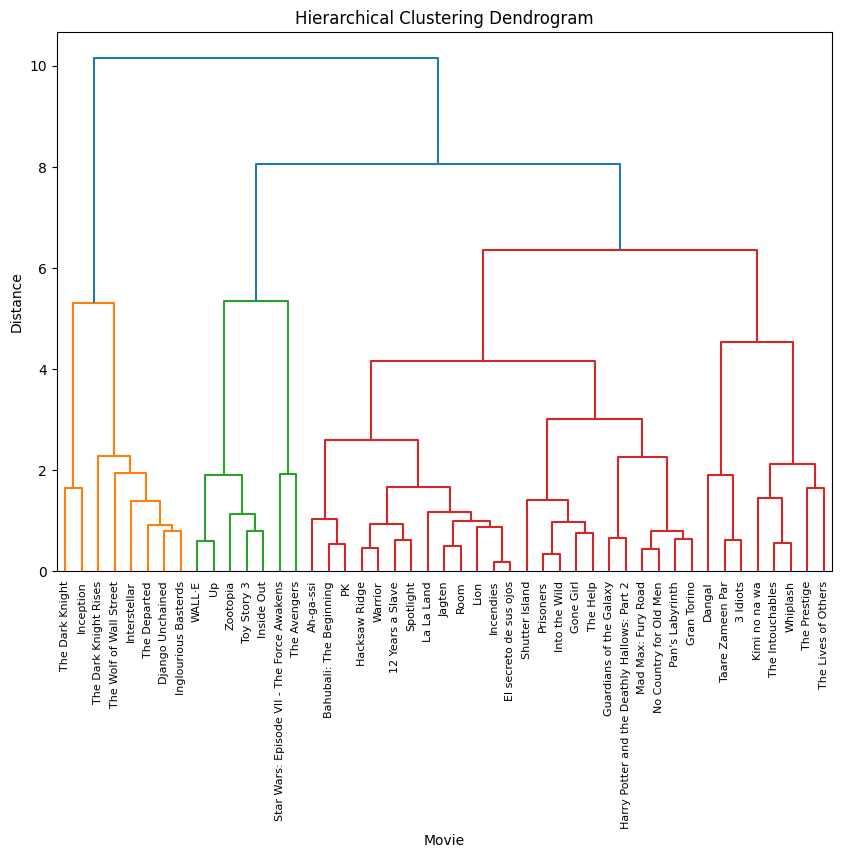

In [31]:
# Apply Agglomerative Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=n_components, linkage='ward')
hierarchical_clusters = hierarchical_model.fit_predict(scaled_data)

# Plot a dendrogram 
linkage_matrix = linkage(scaled_data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df['Title'].tolist())
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Movie')
plt.ylabel('Distance')
plt.show()

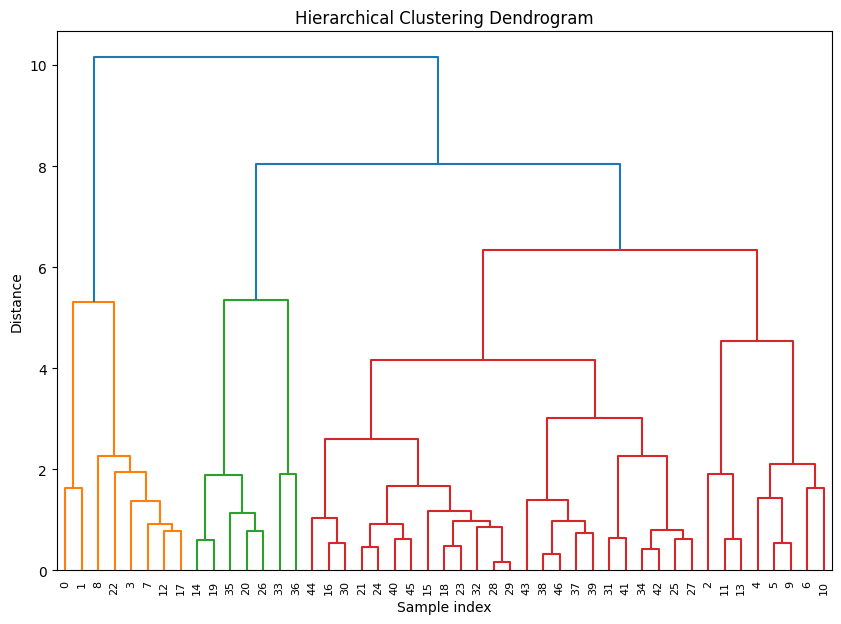

In [32]:
# Apply Agglomerative Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=n_components, linkage='ward')
hierarchical_clusters = hierarchical_model.fit_predict(scaled_data)

# Plot a dendrogram 
linkage_matrix = linkage(scaled_data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()